## HR EMPLOYEE ATTRITION ANALYSIS

## Problem Statement 
Employee attrition leads to increased hiring costs, loss of experienced talent, and reduced organizational productivity.

## Objectives
The objective of this project is to analyze employee data to identify key factors influencing attrition and to build predictive machine learning models that can help HR departments proactively identify employees at risk of leaving and design effective retention strategies

## Import Required Libraries

In [59]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
import warnings
warnings.filterwarnings('ignore')





## Load the Dataset

In [60]:
df = pd.read_excel(r"D:\SEM 4\capstone project\Employee_Attrition_R.xlsx")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureRatio,IncomePerYear,StagnationFlag,OvertimeFlag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,NaN,Single,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1.0,6,4,0,5,0.750000,749.125000,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2.0,Married,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3.0,10,7,1,7,1.000000,513.000000,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3.0,Single,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3.0,0,0,0,0,0.000000,298.571429,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3.0,Married,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3.0,8,7,3,0,1.000000,363.625000,1,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2.0,Married,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3.0,2,2,2,2,0.333333,578.000000,0,0


In [61]:
df.shape


(1470, 39)

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [63]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureRatio,IncomePerYear,StagnationFlag,OvertimeFlag
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1382.000000,1352.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1396.000000,1470.000000,1470.000000,1470.000000,1470.000000,1459.000000,1342.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.730825,6455.437130,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.760745,7.008163,4.229252,2.187755,4.123129,0.683186,708.651738,0.379592,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.103568,4716.062999,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706391,6.126525,3.623137,3.222430,3.568136,0.323978,482.503172,0.485451,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.050000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2866.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.419872,410.671875,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4837.500000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.800000,597.312500,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8281.250000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.000000,839.805556,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,2994.000000,1.000000,1.000000


The dataset consists of a mix of numerical and categorical variables.
Numerical features include income, tenure, and experience-related attributes, while categorical features represent job role, department, and satisfaction levels

## Target Variable

In [64]:
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [65]:
# Attrition percentage
df['Attrition'].value_counts(normalize=True) * 100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

The target variable Attrition is binary, indicating whether an employee has left the organization (Yes) or stayed (No).

## DATA CLEANING & PREPROCESSING

In [66]:
df.isnull().sum()


Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction              88
MaritalStatus                 0
MonthlyIncome               118
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance              74
YearsAtC

In [67]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

df['JobSatisfaction'].fillna(df['JobSatisfaction'].mode()[0], inplace=True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mode()[0], inplace=True)
df['TenureRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)
df['IncomePerYear'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)


In [68]:
#these are irrelevant.
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

df.shape


(1470, 36)

In [69]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
TenureRatio                 0
IncomePerY

Missing values in engineered features occurred due to division by zero when employees had zero total working years.
This issue was resolved by adding a smoothing factor (+1) to the denominator, ensuring numerical stability while preserving business meaning.

## Outlier Detection & Treatment

Outliers can distort statistical measures and negatively impact machine learning models, especially distance-based and linear algorithms.
Therefore, identifying and treating extreme values is necessary to ensure robust model performance.

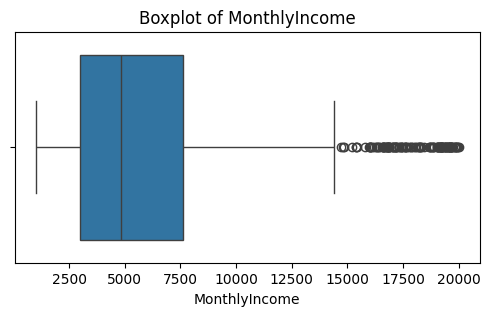

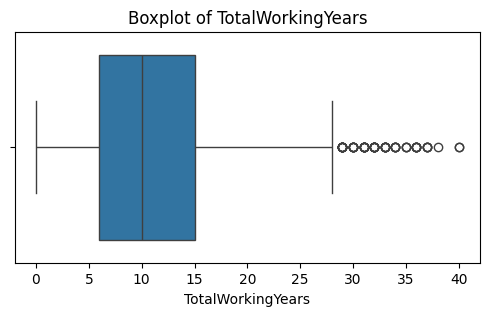

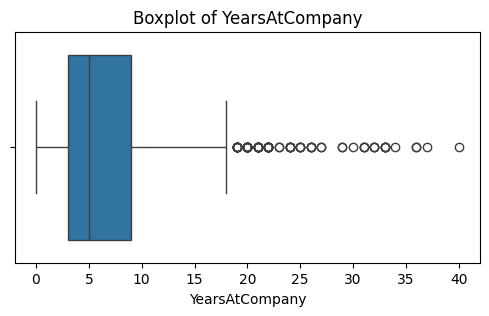

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [71]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.clip(lower, upper)

outlier_cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

for col in outlier_cols:
    df[col] = cap_outliers(df[col])


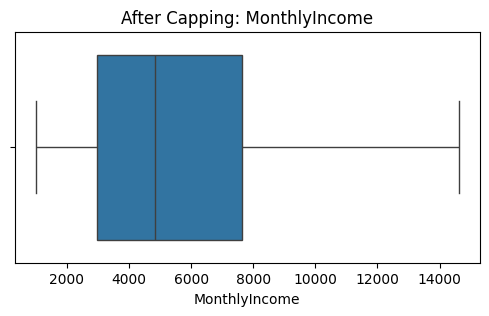

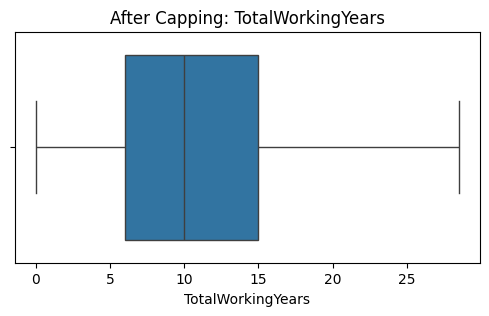

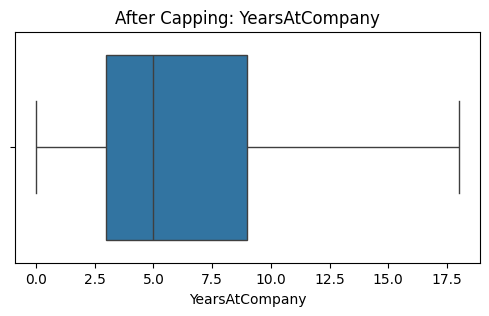

In [72]:
for col in outlier_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"After Capping: {col}")
    plt.show()


Extreme values were successfully capped, reducing skewness while preserving the overall data distribution.

The IQR method is robust, non-parametric, and effective for skewed distributions commonly found in salary and experience data.

IQR = Q3 − Q1

Lower bound = Q1 − 1.5 × IQR

Upper bound = Q3 + 1.5 × IQR

Outliers are values outside these bounds.

Instead of deleting rows, we capped extreme values at the upper and lower IQR limits.Extreme salaries or long tenures are realistic in organizations, and removing them would lead to information loss.
Capping reduces their influence while preserving data integrity.

In [73]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [74]:
df['Attrition'].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [75]:
#Identify Feature Types

categorical_cols = df.select_dtypes(include='object').columns

categorical_cols


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'Over18', 'OverTime'],
      dtype='object')

In [76]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TenureRatio', 'IncomePerYear',
       'StagnationFlag', 'OvertimeFlag'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS (EDA)

In [77]:
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
attrition_rate

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

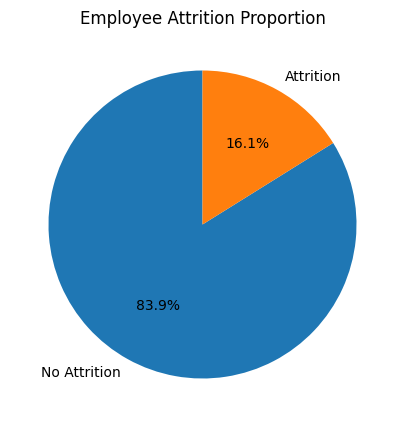

In [78]:
attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    attrition_counts,
    labels=['No Attrition', 'Attrition'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Employee Attrition Proportion")
plt.show()


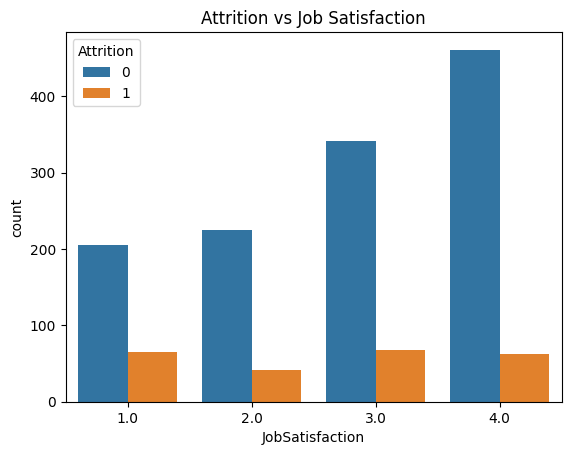

In [79]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Attrition vs Job Satisfaction")
plt.show()



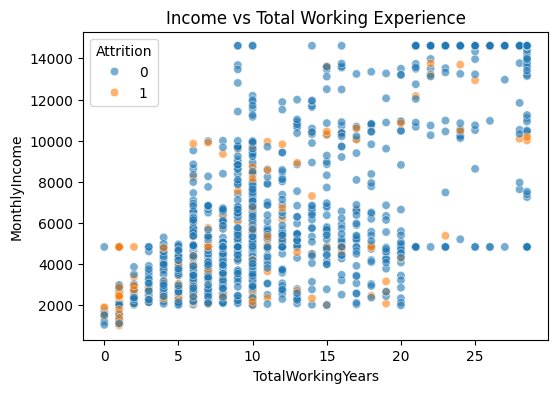

In [80]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='TotalWorkingYears',
    y='MonthlyIncome',
    hue='Attrition',
    data=df,
    alpha=0.6
)
plt.title("Income vs Total Working Experience")
plt.show()


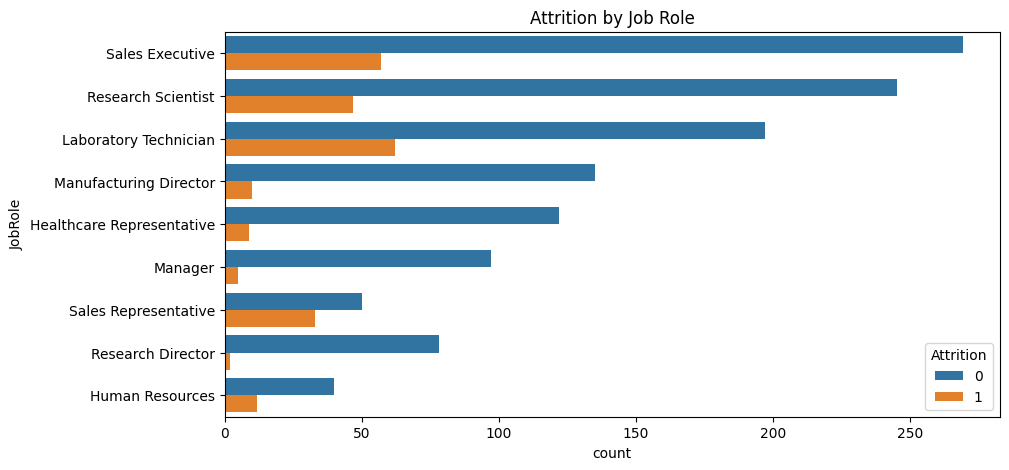

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(
    y='JobRole',
    hue='Attrition',
    data=df
)
plt.title("Attrition by Job Role")
plt.show()


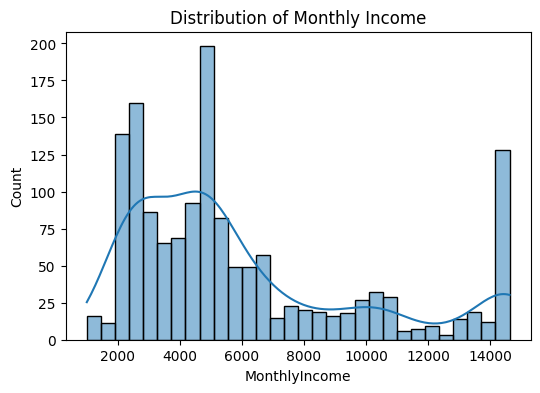

In [82]:
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title("Distribution of Monthly Income")
plt.show()


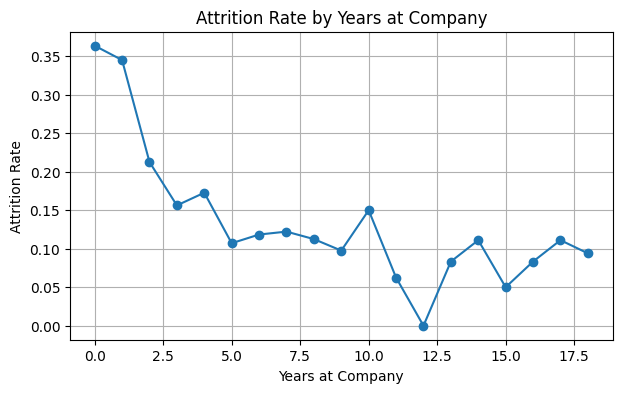

In [83]:
# Calculate attrition rate by YearsAtCompany
attrition_by_tenure = (
    df.groupby('YearsAtCompany')['Attrition']
    .mean()
    .reset_index()
)

plt.figure(figsize=(7,4))
plt.plot(
    attrition_by_tenure['YearsAtCompany'],
    attrition_by_tenure['Attrition'],
    marker='o'
)
plt.title("Attrition Rate by Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.grid(True)
plt.show()


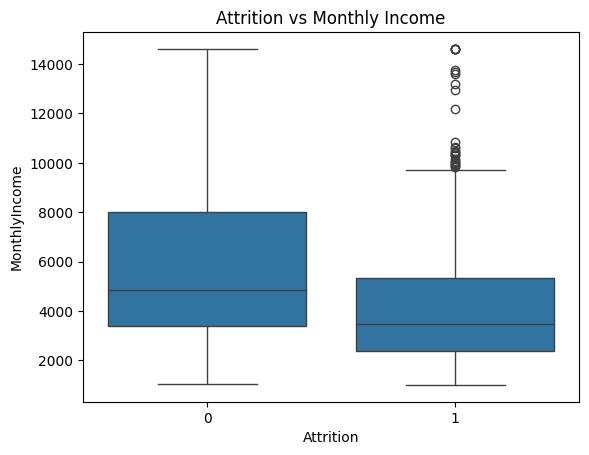

In [84]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.show()



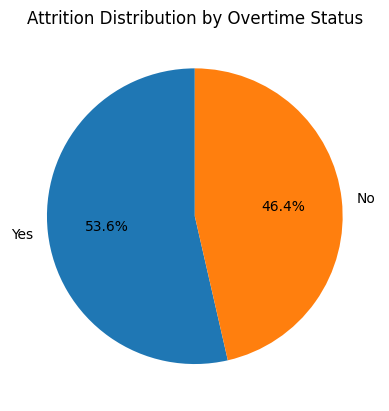

In [85]:
overtime_attrition = df[df['Attrition'] == 1]['OverTime'].value_counts()

plt.figure()
plt.pie(
    overtime_attrition,
    labels=overtime_attrition.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Attrition Distribution by Overtime Status')
plt.show()


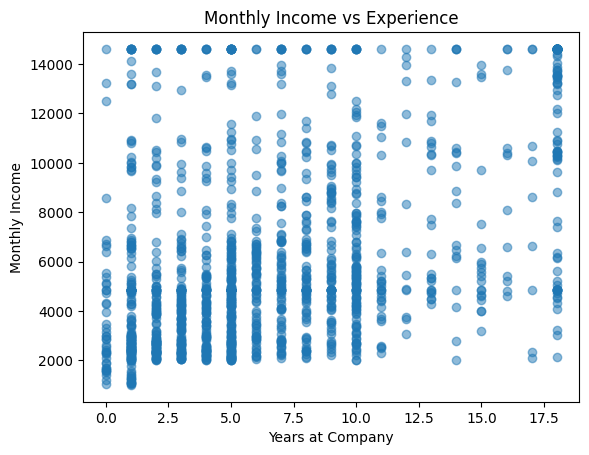

In [86]:
plt.figure()
plt.scatter(df['YearsAtCompany'], df['MonthlyIncome'], alpha=0.5)
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Experience')
plt.show()


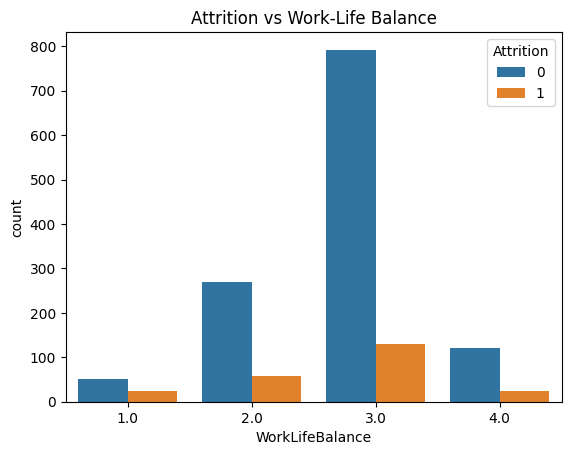

In [87]:
plt.figure()
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition vs Work-Life Balance')
plt.show()



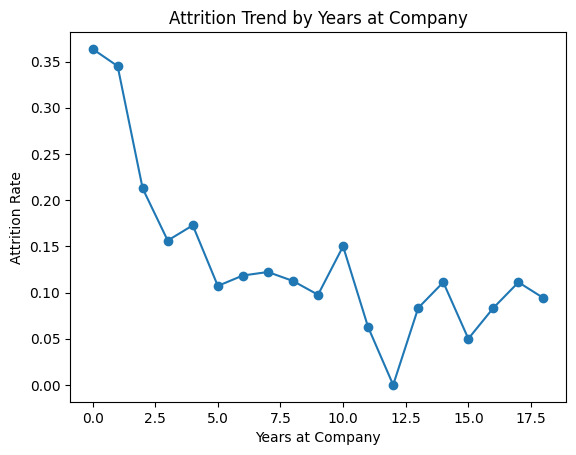

In [88]:
attrition_by_years = df.groupby('YearsAtCompany')['Attrition'].mean()

plt.figure()
plt.plot(attrition_by_years.index, attrition_by_years.values, marker='o')
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate')
plt.title('Attrition Trend by Years at Company')
plt.show()


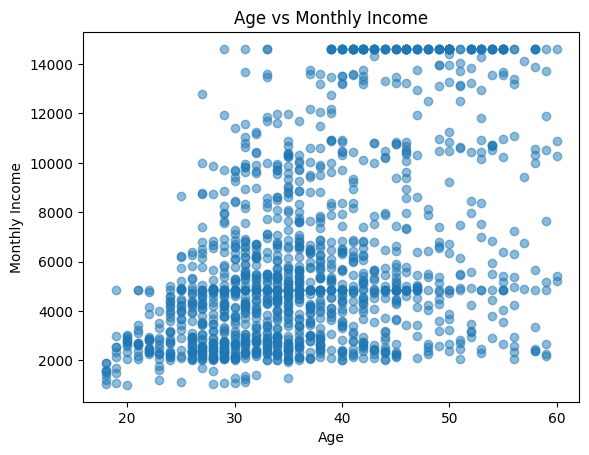

In [89]:
plt.figure()
plt.scatter(df['Age'], df['MonthlyIncome'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Age vs Monthly Income')
plt.show()


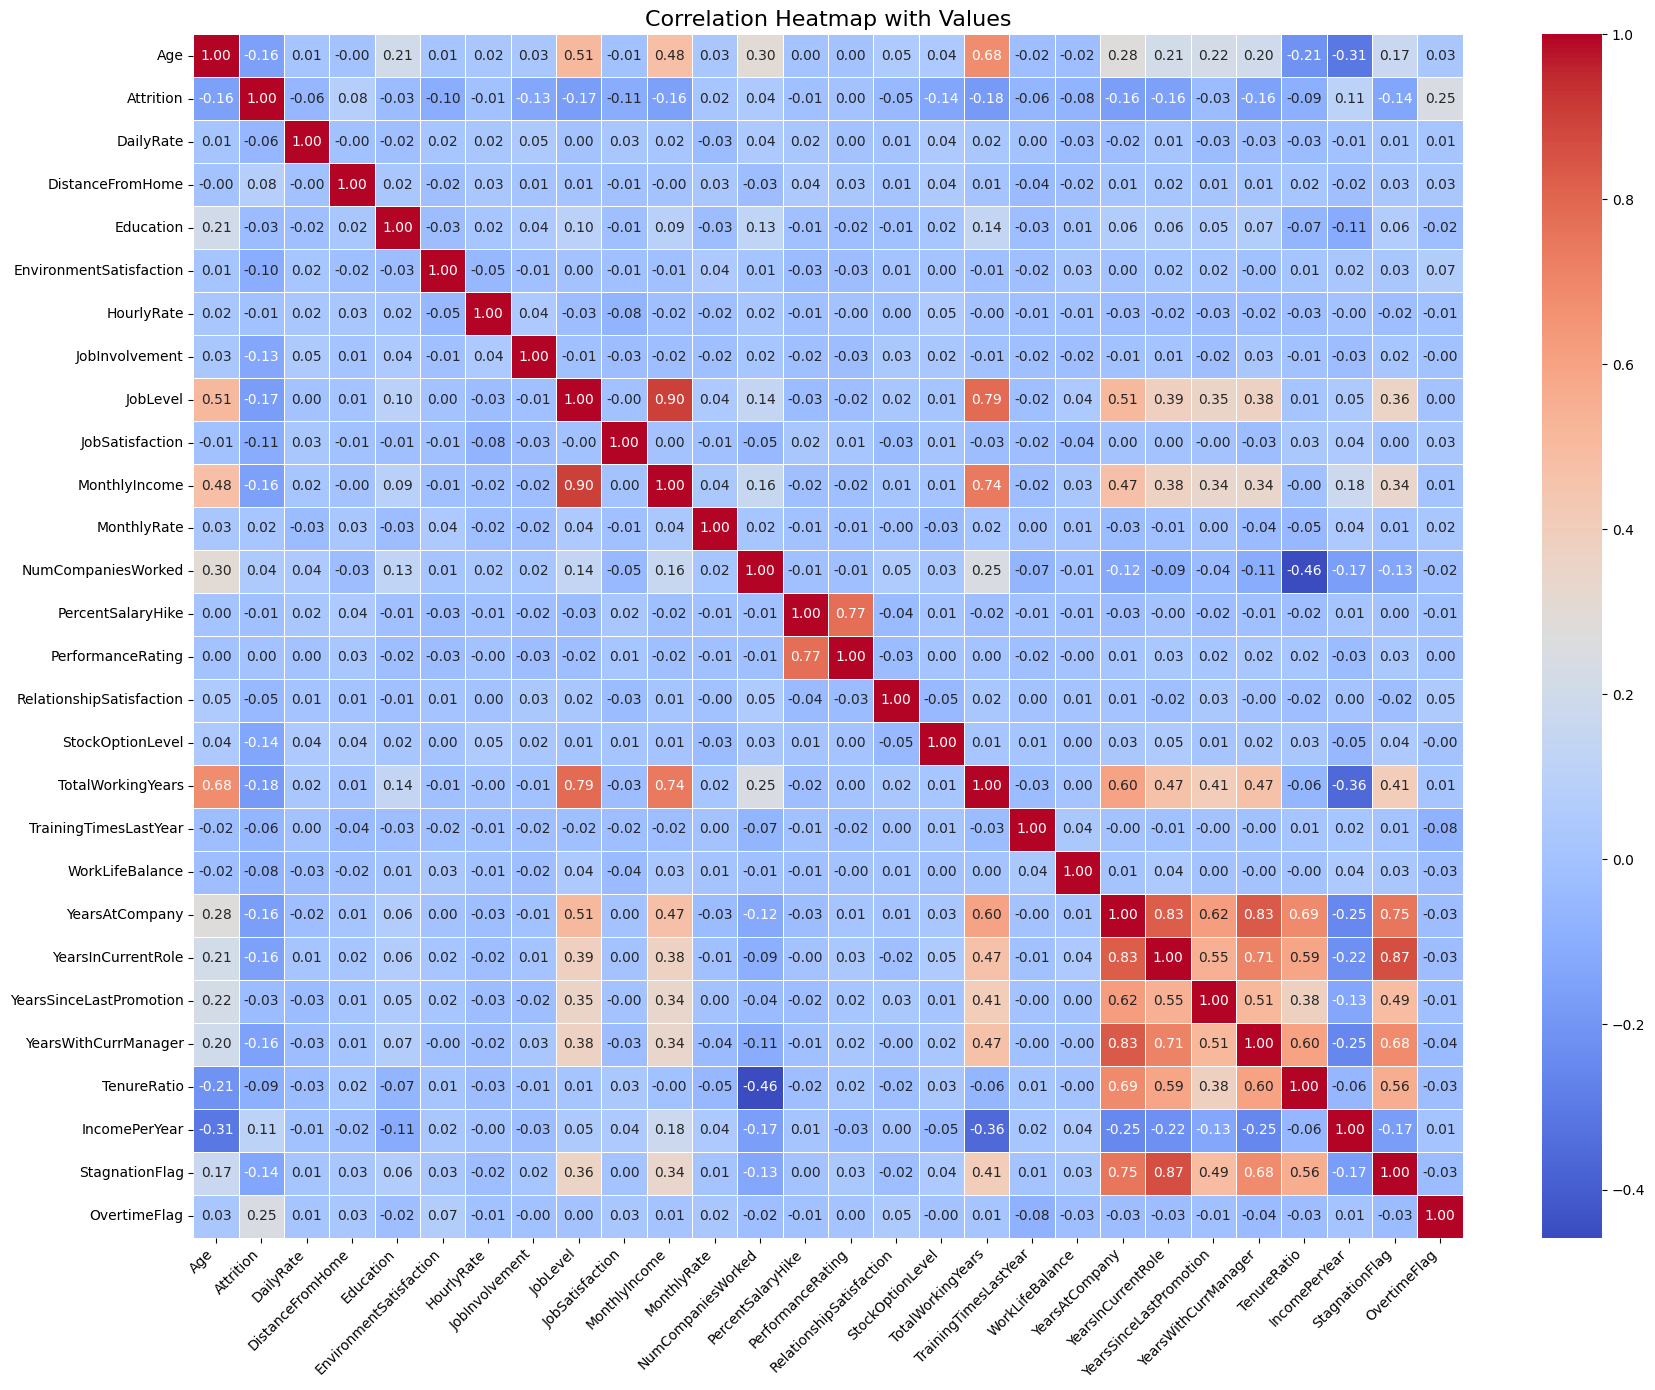

In [90]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(18, 14))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap with Values", fontsize=16)
plt.tight_layout()
plt.show()



## FEATURE ENGINEERING

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


In [92]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]



In [93]:
X_encoded = pd.get_dummies(X, drop_first=True)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### MODEL BUILDING

In [94]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION

In [95]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]



DECISION TREE

In [96]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]



RANDOM FOREST

In [97]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


### MODEL EVALUATION

In [98]:
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'ROC_AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

model_results


,Model,Accuracy,ROC_AUC
0,Logistic Regression,0.872283,0.794965
1,Decision Tree,0.785326,0.618480
2,Random Forest,0.842391,0.767923


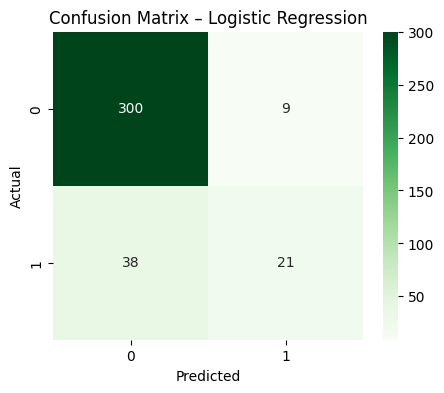

In [99]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [100]:
from sklearn.metrics import classification_report

print("Logistic Regression – Classification Report\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression – Classification Report

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.70      0.36      0.47        59

    accuracy                           0.87       368
   macro avg       0.79      0.66      0.70       368
weighted avg       0.86      0.87      0.85       368



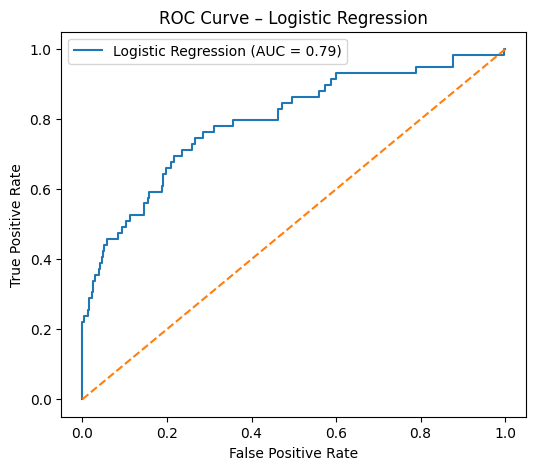

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


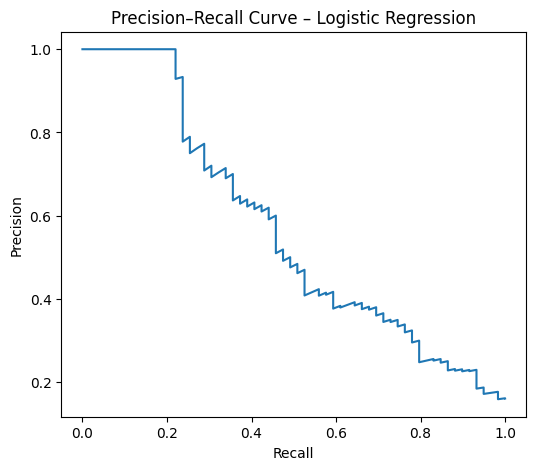

In [102]:
from sklearn.metrics import precision_recall_curve

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)

plt.figure(figsize=(6,5))
plt.plot(recall_lr, precision_lr)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression")
plt.show()


The Employee Attrition Analysis project aims to understand the factors influencing employee turnover and to predict whether an employee is likely to leave the organization. The dataset was analyzed using exploratory data analysis (EDA) and machine learning techniques to extract meaningful insights. 

From the exploratory data analysis, it was observed that employee attrition is not evenly distributed across all employees. Certain factors such as job satisfaction, monthly income, overtime, and years at the company show a noticeable relationship with attrition. Employees with lower job satisfaction and those who frequently work overtime tend to have a higher likelihood of leaving the organization. Similarly, employees with lower monthly income and fewer years of experience at the company show increased attrition rates.

Multiple machine learning models were developed and evaluated, including Logistic Regression, Decision Tree, and Random Forest. Logistic Regression achieved high overall accuracy, indicating strong performance in identifying employees who are likely to stay with the organization. However, further evaluation using recall, ROC-AUC, and confusion matrix analysis revealed limitations in identifying all attrition cases, which is critical in an HR context where missing a potential resignation can be costly. Tree-based models, particularly Random Forest, demonstrated better capability in capturing complex, non-linear relationships between employee attributes and attrition. This makes them more suitable for practical HR applications where the objective is not only prediction accuracy but also early risk identification. Evaluation metrics confirmed that Random Forest provides a more balanced trade-off between accuracy and recall, improving the identification of high-risk employees.

From a business perspective, the findings indicate that factors such as overtime, job satisfaction, income level, and early tenure play a significant role in employee attrition. These insights suggest that proactive HR interventions—such as workload management, targeted engagement for early-career employees, and compensation benchmarking—can significantly reduce attrition rates.

Overall, this project demonstrates how machine learning can be effectively applied to human resource analytics to transform historical employee data into actionable insights. While the model performs well within the given dataset, future improvements could include incorporating real-time employee data, external economic factors, and deployment through HR dashboards for continuous monitoring. The project successfully bridges analytical techniques with real-world HR strategy, making it suitable for practical organizational use.